# Testes de hipóteses com bootstrap

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
lift = 1.1
test = np.random.binomial(100, p=0.2 * lift, size=10000)
ctrl = np.random.binomial(100, p=0.2, size=50000)

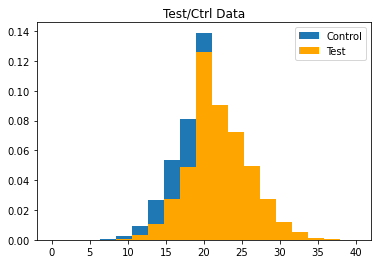

In [ ]:
bins = np.linspace(0, 40, 20)

plt.hist(ctrl, bins=bins, label='Control', density=True)
plt.hist(test, bins=bins, label='Test', color='orange', density=True)
plt.title('Test/Ctrl Data')
plt.legend()

In [ ]:
from scipy import stats
print("teste: {0}".format(stats.describe(test)))
print("control: {0}".format(stats.describe(ctrl)))

teste: DescribeResult(nobs=10000, minmax=(6, 38), mean=22.0472, variance=17.345106670667064, skewness=0.11499936618094198, kurtosis=0.03337285094140485)
control: DescribeResult(nobs=50000, minmax=(5, 38), mean=19.9824, variance=16.126012760255204, skewness=0.16119314129286946, kurtosis=0.0045769438023759434)


In [ ]:
def boostrapper(A_vec, B_vec, sample_size, resample):
    A_avg_vec = A_vec[(np.random.rand(resample, sample_size)*len(A_vec)).astype(int)].mean(axis = 1)
    B_avg_vec = B_vec[(np.random.rand(resample, sample_size)*len(B_vec)).astype(int)].mean(axis = 1)
    return A_avg_vec, B_avg_vec

In [ ]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 500)

Distribuição a posterior aproximada dos parâmetros!

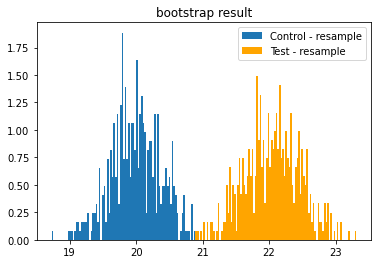

In [ ]:
bins = 100

plt.hist(B_avg_vec, bins=bins, label='Control - resample', density=True)
plt.hist(A_avg_vec, bins=bins, label='Test - resample', color='orange', density=True)
plt.title('bootstrap result')
plt.legend()

In [ ]:
print("teste: {0}".format(stats.describe(A_avg_vec)))
print("control: {0}".format(stats.describe(B_avg_vec)))

teste: DescribeResult(nobs=500, minmax=(20.89, 23.31), mean=22.04738, variance=0.17946867294589175, skewness=-0.016824556083855965, kurtosis=-0.15817879318147776)
control: DescribeResult(nobs=500, minmax=(18.73, 21.17), mean=19.99814, variance=0.14745244529058113, skewness=-0.03200955840937172, kurtosis=0.0061399218704201175)


In [ ]:
#realizando o teste após o bootstap

In [ ]:
from scipy import stats
stats.ttest_ind(A_avg_vec,B_avg_vec)

Ttest_indResult(statistic=80.14129183660037, pvalue=0.0)

# agora testando com dados assimétricos

In [ ]:
lift = 1.3

test = np.random.gamma(shape = 5*lift, scale = 1/4, size=10000)
ctrl = np.random.gamma(shape = 5, scale = 1/4, size=50000)

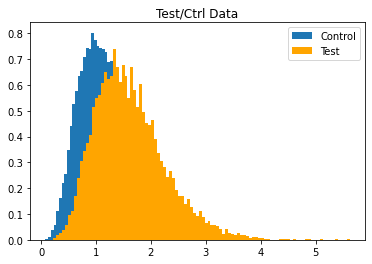

In [ ]:
bins = 100

plt.hist(ctrl, bins=bins, label='Control', density=True)
plt.hist(test, bins=bins, label='Test', color='orange', density=True)
plt.title('Test/Ctrl Data')
plt.legend()

In [ ]:
from scipy import stats
print("teste: {0}".format(stats.describe(test)))
print("control: {0}".format(stats.describe(ctrl)))

teste: DescribeResult(nobs=10000, minmax=(0.22192407301705994, 5.624505637228672), mean=1.6210150681649884, variance=0.40734340448020007, skewness=0.8090572227821764, kurtosis=0.9976866297054969)
control: DescribeResult(nobs=50000, minmax=(0.077069337858008, 4.993513139592547), mean=1.246893496222226, variance=0.3125277790597435, skewness=0.9065908517542457, kurtosis=1.2866275247180692)


In [ ]:
def boostrapper(A_vec, B_vec, sample_size, resample):
    A_avg_vec = A_vec[(np.random.rand(resample, sample_size)*len(A_vec)).astype(int)].mean(axis = 1)
    B_avg_vec = B_vec[(np.random.rand(resample, sample_size)*len(B_vec)).astype(int)].mean(axis = 1)
    return A_avg_vec, B_avg_vec

In [ ]:
A_avg_vec, B_avg_vec = boostrapper(test, ctrl, 100, 500)

Distribuição a posterior aproximada dos parâmetros!

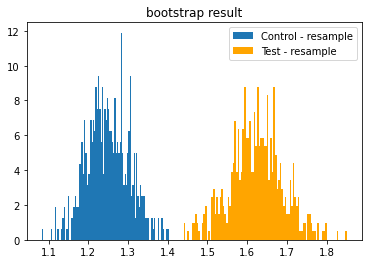

In [ ]:
bins = 100

plt.hist(B_avg_vec, bins=bins, label='Control - resample', density=True)
plt.hist(A_avg_vec, bins=bins, label='Test - resample', color='orange', density=True)
plt.title('bootstrap result')
plt.legend()

In [ ]:
#probabilidade da diferença entre A e B ser maior que zero.
sum(A_avg_vec - B_avg_vec > 0)/len(A_avg_vec)

1.0

In [ ]:
#realizando o teste após o bootstap

In [ ]:
from scipy import stats
stats.ttest_ind(A_avg_vec,B_avg_vec)

Ttest_indResult(statistic=96.8560517543578, pvalue=0.0)

# Modelo em produção

# Gerando um dataset e treinando um modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
rng = np.random.RandomState(0)
X, y = make_classification(n_samples=1000, n_features = 5, random_state=rng)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ajustando um random forest

In [ ]:
clf = RandomForestClassifier(n_estimators=10, random_state=rng)
model = clf.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, recall_score, precision_score
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96        99
           1       0.96      0.97      0.97       101

    accuracy                           0.96       200
   macro avg       0.97      0.96      0.96       200
weighted avg       0.97      0.96      0.96       200



In [ ]:
model_metrics = dict()
model_metrics['recall'] = recall_score(y_test, pred)
model_metrics['precision'] = precision_score(y_test, pred)

In [ ]:
model_metrics

{'recall': 0.9702970297029703, 'precision': 0.9607843137254902}

In [ ]:
import json

with open('metrics/model_metrics_version_clf.json', 'w') as fp:
    json.dump(model_metrics, fp)

## Salvando modelo

In [ ]:
from joblib import dump, load

In [ ]:
dump(clf, 'models/clf.joblib') 

['clf.joblib']

# Criando API

In [ ]:
from flask import Flask, request, url_for, redirect, render_template, jsonify
import numpy as np
import pandas as pd

In [ ]:
app = Flask(__name__)

In [ ]:
model = load('models/clf.joblib')

In [ ]:
@app.route('/')
def home():
    return render_template('templates/template.html')

In [ ]:
@app.route('/predict', methods = ['POST'])
def predict():
    #request of all inputs
    features = [x for x in request.form.values()]
    
    #data preparing
    features_array = np.array(features)
    pandas_features = pd.DataFrame([features_array])
    print(features)
    
    #predict
    pred = model.predict(pandas_features)
    print(pred)
    prediction = int(pred[0])
    return render_template("home.html", pred = "prediction: {}".format(prediction))

In [ ]:
@app.route('/model_health/<model_id>', methods = ['GET'])
def model_health(model_id):
    with open('metrics/model_metrics_version_{0}.json'.format(model_id)) as f:
        model_metrics = json.load(f)    
        return model_metrics